# Belgium Road Signs

In [97]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
import os
from skimage import transform
from skimage.color import rgb2gray
import random

In [98]:
print(tf.__version__)

1.15.0


## Import dataset
The dataset was imported to the memory using the following function.

In [99]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith('.ppm')]
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
    
    return images, labels

In [100]:
# Directory routes for datasets
main_dir = '../datasets/belgian/'
train_data_dir = os.path.join(main_dir, 'Training')
test_data_dir = os.path.join(main_dir, 'Testing')

We create the labels and images for the training dataset and the same for the testing dataset.

In [101]:
train_images, train_labels = load_ml_data(train_data_dir)

In [102]:
test_images, test_labels = load_ml_data(test_data_dir)

## Data analysis

We analyze data in order to know how it was loaded and if we need to do some changes before we can continue.
As we have mentioned, edges will be the images represented as linear arrays. We convert the images from a matrix to a linear array using numpy library.

In [103]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [104]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [105]:
train_labels.size

4575

In [106]:
test_labels.size

2520

In [107]:
len(set(train_labels))

62

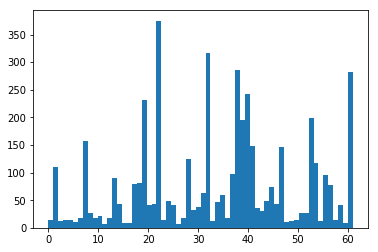

In [108]:
plt.hist(train_labels, len(set(train_labels)))
plt.show()

We can see the images distribution in the histogram above. There are more images of some road signs than the others.

In [109]:
train_images = [transform.resize(image, (30,30)) for image in train_images]
test_images = [transform.resize(image, (30,30)) for image in test_images]

In [110]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [111]:
train_images.shape

(4575, 30, 30, 3)

In [112]:
len(train_labels)

4575

## Pre-process dataset
The dataset must be pre-processed before training the network.

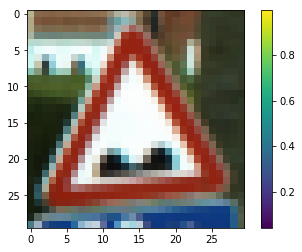

In [113]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

As we can see, the images have 3 rgb color values. It is better for creating the model to turn them gray because there are more colored images than others. This will increase the model accuracy.

In [114]:
# Convert from rgb to gray
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

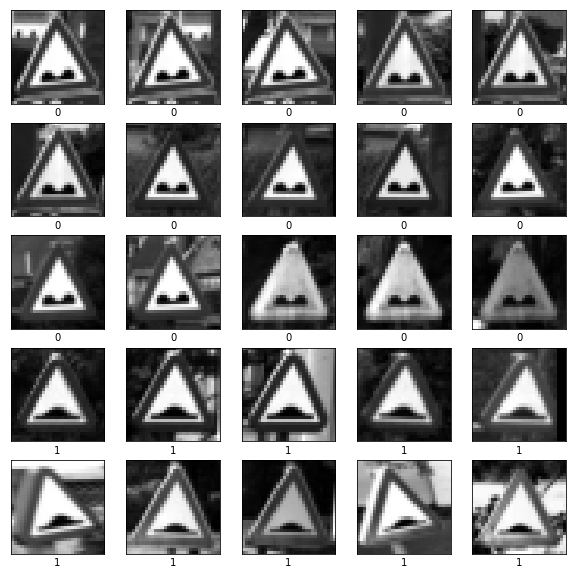

In [115]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

## Model building

### Configure layers 
The basic building blocks of a neural network are layers. Layers extract representations of the dataset that is fed to them. 
Most deep learning algorithms consist of joining simple layers. Mainly layers like tf.keras.layers.Dense, have parameters that are learned during training.

In [116]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30, 30)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(62, activation='softmax')
])

The first layer of this network, tf.keras.layers.Flatten, transforms the image format from a two-dimensional array (30 by 30 pixels) to a one-dimensional array (30 * 30 pixels = 900 pixels). This layer has no parameters to learn; just reformat the dataset.

After the pixels are "flattened", the sequence consists of two layers stf.keras.layers.Dense. These are densely or completely connected. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is of 62 softmax nodes that returns an array of 62 probabilities that add up to 1. Each node contains a rating that indicates the probability that the current image belongs to one of the 62 classes. 

### Compile model
Before the model is ready for training, a few more settings are needed. These are added during the model compile step:
* Loss function. This measures how accurate the model is during training. We want to minimize this function to steer the model in the proper direction.
* Optimizer. This is how the model updates based on the dataset you see and the loss function. 
* Metrics. They are used to monitor training and testing steps. The following example uses accuracy, the fraction of images that are correctly classified. 

In [117]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
Training the neural network model requires the following steps:
1. Deliver the training data to the model. In this example, the training dataset is in the train_images and train_labels arrays.
2. The model learns to associate images and labels. 
3. Ask the model to make predictions on a set of data found in the example, included in the test_images array. Verify that the predictions are equal to the labels of the test_labels array. 

To start training, we call the model.fit method, it is so called because it fits the model to the training dataset.

In [118]:
model.fit(train_images, train_labels, epochs=20)

Train on 4575 samples
Epoch 1/20
4575/4575 [==============================] - 0s 103us/sample - loss: 2.8961 - acc: 0.3593
Epoch 2/20
4575/4575 [==============================] - 0s 88us/sample - loss: 1.8934 - acc: 0.5738
Epoch 3/20
4575/4575 [==============================] - 0s 89us/sample - loss: 1.4065 - acc: 0.6918
Epoch 4/20
4575/4575 [==============================] - 0s 87us/sample - loss: 1.1297 - acc: 0.7445
Epoch 5/20
4575/4575 [==============================] - 0s 85us/sample - loss: 0.9313 - acc: 0.7910
Epoch 6/20
4575/4575 [==============================] - 0s 88us/sample - loss: 0.8048 - acc: 0.8162
Epoch 7/20
4575/4575 [==============================] - 0s 88us/sample - loss: 0.7006 - acc: 0.8409
Epoch 8/20
4575/4575 [==============================] - 0s 93us/sample - loss: 0.6169 - acc: 0.8505
Epoch 9/20
4575/4575 [==============================] - 0s 88us/sample - loss: 0.5472 - acc: 0.8734
Epoch 10/20
4575/4575 [==============================] - 0s 93us/sample - los

## Testing accuracy
Compare how the model performs on the testing dataset

In [119]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

2520/2520 - 0s - loss: 0.5131 - acc: 0.8734


As we can see, the accuracy for the model in the testing dataset is shown above. We can improve the accuracy by doing more epochs at the training phase.

## Doing predictions
We can use the trained model to make predictions about images

In [120]:
predictions = model.predict(test_images)

In [121]:
predictions[0]

array([1.90897107e-01, 7.22643256e-01, 1.34872198e-05, 4.55284026e-03,
       2.29572091e-04, 1.12840615e-03, 4.50677471e-04, 3.55178074e-08,
       6.25613611e-04, 1.61788139e-05, 3.24678305e-03, 6.28986454e-04,
       1.72833726e-02, 1.06444764e-04, 9.99583208e-05, 7.24410575e-06,
       7.70322978e-04, 9.37771995e-13, 1.66078866e-03, 3.24895754e-02,
       1.09249295e-05, 3.96628451e-07, 1.70660933e-04, 4.72305857e-08,
       9.12829673e-11, 2.84425639e-09, 3.83042105e-11, 1.18213359e-08,
       2.39887711e-04, 3.23327787e-09, 3.11994586e-09, 2.75428813e-09,
       1.52433495e-06, 1.88062386e-05, 2.89018528e-04, 7.20606431e-06,
       4.89934280e-07, 3.46042571e-14, 5.14021469e-03, 3.33085591e-05,
       1.93021742e-06, 1.72725822e-06, 2.22331407e-11, 8.02468578e-11,
       5.03516638e-11, 9.32065447e-08, 1.22229234e-12, 4.39379672e-10,
       1.28039313e-14, 2.25324682e-13, 2.71279978e-11, 2.38080133e-06,
       3.96071804e-12, 3.77733057e-04, 1.20594315e-02, 4.22573748e-07,
      

A prediction is an array of 62 numbers. These represent the level of "confidence" of the model about the images of each of the 62 Belgium road signs items. We can check which one has the highest level of confidence

In [122]:
np.argmax(predictions[20])

1

In [123]:
test_labels[20]

1

In [124]:
# Functions for showing predictions using matplotlib
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(62))
    plt.yticks([])
    thisplot = plt.bar(range(62), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

The output will be a plot. The predicted image is on the left, as the probability histogram between the possible answers is on the right. If the result is correct the font is shown in blue, otherwise, it is shown in red.

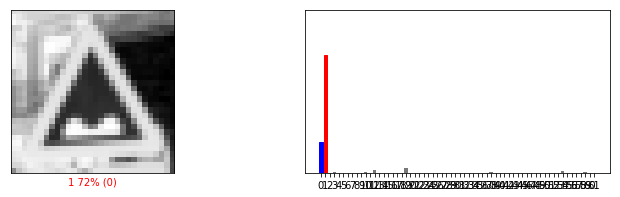

In [125]:
i = 0
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

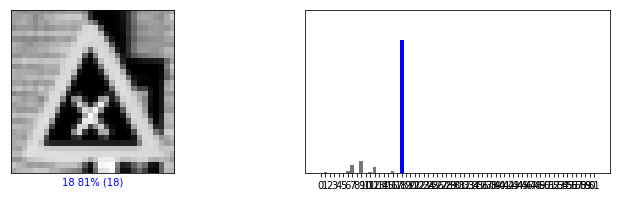

In [126]:
i = 521
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [127]:
rand_signs = random.sample(range(0, len(test_labels)), 15)
rand_signs

[1238,
 887,
 1496,
 1284,
 2374,
 1878,
 1962,
 407,
 1516,
 2358,
 1608,
 95,
 955,
 1117,
 666]

Now let’s test it with 15 random images.

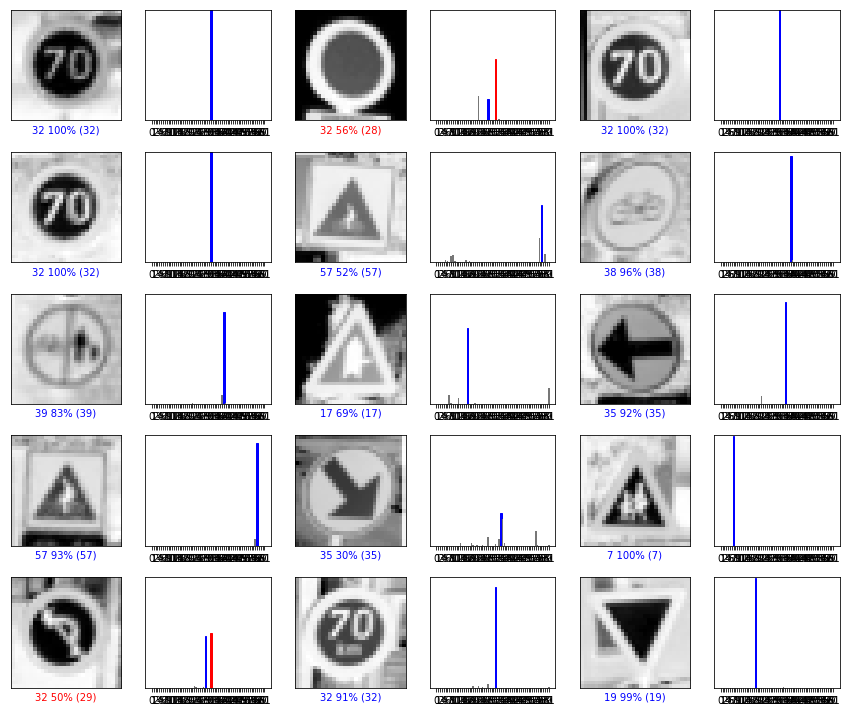

In [128]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(rand_signs)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(rand_signs[i], predictions[rand_signs[i]], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(rand_signs[i], predictions[rand_signs[i]], test_labels)
plt.tight_layout()
plt.show()

We can see the prediction result!